### 3I005 Statistique et informatique -- Dao Quoc Hiep

# Projet 3 : Analyse de séquences génomiques

## Partie 1 : Rappels de biologie

## Partie 2 : Préliminaires : données et lecture des fichiers

In [140]:
import io
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import factorial
import scipy.stats as stats
%matplotlib inline 
import random 

#Définition des nucléotides
nucleotide = {'A':0,'C':1,'G':2,'T':3}
nucleotide_indetermine = {'A':0,'C':1,'G':2,'T':3,'N':-1}

def decode_sequence(sequence):
    inv_nucleotide = {v:k for k, v in nucleotide_indetermine.items()}
    to_str = ""
    for i in sequence:
        if(i in inv_nucleotide):
            to_str += inv_nucleotide[i]
        else:
            to_str += 'N'
    return to_str
    

def encode_sequence(string):
    to_list = []
    for base in string:
        if(base in nucleotide_indetermine):
            to_list.append(nucleotide_indetermine[base])
    return to_list

def read_fasta(fasta_filepath):
    fasta_file = io.open(fasta_filepath, 'r')
    current_sequence = ""
    sequences_dict = {}
    for line in fasta_file.readlines():
        if(line[0] == '>'):
            current_sequence = line
            sequences_dict[line] = []
        else:
            for nucl in line:
                if(nucl in nucleotide_indetermine):
                    sequences_dict[current_sequence].append(nucleotide_indetermine[nucl])

    return sequences_dict
    
def nucleotide_count(sequence):
    count = [0 for k in nucleotide]
    for nucl in sequence:
        if(nucl >= 0):
            count[nucl] += 1
    return count

def nucleotide_frequency(sequence):
    count = [0 for k in nucleotide]
    n_nucl = 0.
    for nucl in sequence:
        if(nucl >= 0):
            count[nucl] += 1
            n_nucl += 1.
    return count/(np.sum(count))

In [2]:
%load_ext autoreload
%autoreload 2

##### Question 1

In [3]:
for fichier in ["regulatory_seq_PHO.fasta","regulatory_seqs_GAL.fasta","regulatory_seqs_MET.fasta","yeast_s_cerevisae_genomic_chr1-4.fna"]:
    d = read_fasta(fichier)
    tot = 0
    for elem in d:
        tot += sum(nucleotide_count(d[elem]))
    print("Fichier {} : {} séquences, {} nucléotides.".format(fichier, len(d.keys()), tot))

Fichier regulatory_seq_PHO.fasta : 5 séquences, 4000 nucléotides.
Fichier regulatory_seqs_GAL.fasta : 7 séquences, 5608 nucléotides.
Fichier regulatory_seqs_MET.fasta : 9 séquences, 7200 nucléotides.
Fichier yeast_s_cerevisae_genomic_chr1-4.fna : 4 séquences, 2515853 nucléotides.


##### Question 2

In [79]:
d_cerevisae = read_fasta("yeast_s_cerevisae_genomic_chr1-4.fna")
s = []
for key in d_cerevisae:
    s += d_cerevisae[key]
a, c, g, t = nucleotide_frequency(s)
print("Fréquence des nucléotides :")
print("A : {:.8f}".format(a))
print("C : {:.8f}".format(c))
print("G : {:.8f}".format(g))
print("T : {:.8f}".format(t))

Fréquence des nucléotides :
A : 0.29983548
C : 0.20110197
G : 0.19999698
T : 0.29906557


##### Question 3

In [5]:
def logproba(liste_entiers, m):
    somme = 0
    for i in liste_entiers:
        somme += math.log(m[i])
    return somme
print(logproba(encode_sequence("CAT"), [0.2,0.3,0.1,0.4]))

-3.7297014486341915


##### Question 4

In [6]:
def logprobafast(nucleotide_count, m):
    res = 0
    for nucl in range(len(nucleotide_count)):
        nb_nucl = nucleotide_count[nucl]
        res += math.log(m[nucl]) * nb_nucl
    return res
print(logprobafast(nucleotide_count(encode_sequence("CAT")),[0.2,0.3,0.1,0.4]))

-3.7297014486341915


## Partie 3 : Annotation des régions promoteurs

#### Question 1

In [7]:
def code(m,k):
    s = 0
    j = k - 1
    for i in m:
        s += nucleotide[i] * 4 **j
        j -= 1
    return s
code('TAC',3)
        

49

In [8]:
def inverse(index, k):
    j = 4**(k - 1)
    m = ''
    while(j >= 1): 
        a = index // j
        index = index % j
        if a == nucleotide['T']:
            m += 'T'
        elif a == nucleotide['A']:
            m += 'A'
        elif a == nucleotide['C']:
            m += 'C'
        elif a == nucleotide['G']:
            m += 'G'  
        j /= 4
    return m
inverse(49,3)

'TAC'

In [9]:
def compte_occurences(seq,k):
    dict_mots = dict()
    for i in range(4**k):
        mot = inverse(i, k)
        dict_mots[mot] = 0
    keys = dict_mots.keys()
    for i in range(len(seq)-k+1):
        mot = seq[i : i+k]
        if mot in keys:
            dict_mots[mot] = dict_mots[mot] + 1
    return dict_mots
compte_occurences('ATCAT',2)

{'AA': 0,
 'AC': 0,
 'AG': 0,
 'AT': 2,
 'CA': 1,
 'CC': 0,
 'CG': 0,
 'CT': 0,
 'GA': 0,
 'GC': 0,
 'GG': 0,
 'GT': 0,
 'TA': 0,
 'TC': 1,
 'TG': 0,
 'TT': 0}

In [10]:
compte_occurences('ATCAT',2)

{'AA': 0,
 'AC': 0,
 'AG': 0,
 'AT': 2,
 'CA': 1,
 'CC': 0,
 'CG': 0,
 'CT': 0,
 'GA': 0,
 'GC': 0,
 'GG': 0,
 'GT': 0,
 'TA': 0,
 'TC': 1,
 'TG': 0,
 'TT': 0}

#### Question 2

Si on connait les fréquences des lettres dans le génome, et qu'on considère que les lettres apparaissent successivement et de manière aléatoire, alors le nombre attendu d'occurences pour un mot $w$ dans une séquence de longueur $l$ est :

$$ nb_{occ} = (l-k+1) \times \prod_{n \in w}f(n)$$ 

Avec $k$ la taille du mot et $f(n)$ la fréquence de la lettre $n$.

In [11]:
def comptage_attendu(freq, k, l):
    """
        Revoie les comptages attendus pour tous les mots de longueur k
        - freq : fréquence des nucléotides
        - k : taille des mots
        - l : longueur du génome
    """
    dict_mots = dict()
    
    for i in range(4**k):
        
        mot = inverse(i, k) 
        
        # Conversion du mot en liste d'entier
        liste_entiers = []
        for n in mot :
            liste_entiers.append(nucleotide_indetermine[n])
            
        fmot = math.e ** logprobafast(nucleotide_count(liste_entiers), freq)
        dict_mots[mot] = int((l-k+1) * fmot)
        
    return dict_mots

In [12]:
comptage_attendu([0.5, 0.2, 0.4, 0.3], 2, 100)

{'AA': 24,
 'AC': 9,
 'AG': 19,
 'AT': 14,
 'CA': 9,
 'CC': 3,
 'CG': 7,
 'CT': 5,
 'GA': 19,
 'GC': 7,
 'GG': 15,
 'GT': 11,
 'TA': 14,
 'TC': 5,
 'TG': 11,
 'TT': 8}

In [14]:
compte_occurences('ATCAT',2)

{'AA': 0,
 'AC': 0,
 'AG': 0,
 'AT': 2,
 'CA': 1,
 'CC': 0,
 'CG': 0,
 'CT': 0,
 'GA': 0,
 'GC': 0,
 'GG': 0,
 'GT': 0,
 'TA': 0,
 'TC': 1,
 'TG': 0,
 'TT': 0}

#### Question 3

In [15]:
def trace_graphique2D_occurences(seq, k):

    seq_string = decode_sequence(seq)
    
    freq = nucleotide_frequency(seq)
    l = len(seq)
    print("taille de la séquence : ", l, " nucléotides", sep="")
    
    attendu = list(comptage_attendu(freq, k, l).values())
    observe = list(compte_occurences(seq_string, k).values())
    #x = [i for i in range(4**k)]
    
    #observe_attendu = [observe[i]-attendu[i] for i in x]

    
    plt.plot(attendu, observe,"o" ,label = "Observations - Résultat attendu",color='r') 
    plt.plot([x for x in range(int(max(attendu))+1)],color='blue')
    plt.legend(loc="best")
    plt.xlabel("Nombre d'occurences")
    plt.ylabel("Nombre observé")
    plt.title("Etude du nombre d'occurence des mots")
    plt.grid()
    plt.show()

In [16]:
d_PHO = read_fasta("regulatory_seq_PHO.fasta")
d_GAL = read_fasta("regulatory_seqs_GAL.fasta")
d_MET = read_fasta("regulatory_seqs_MET.fasta")
d_cerevisae = read_fasta("yeast_s_cerevisae_genomic_chr1-4.fna")

In [17]:
def convert_dict_to_sequence(d):
    liste_entiers = []
    for key in d.keys():
        liste_entiers.extend(d[key])
    return liste_entiers

In [18]:
seq_PHO_list = convert_dict_to_sequence(d_PHO)
seq_GAL_list = convert_dict_to_sequence(d_GAL)
seq_MET_list = convert_dict_to_sequence(d_MET)
seq_s_cerevisae_list = list(d_cerevisae.values())[0]

#### Analyse PHO

taille de la séquence : 4000 nucléotides


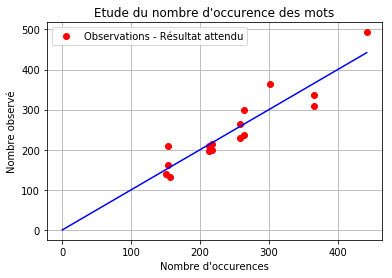

In [19]:
trace_graphique2D_occurences(seq_PHO_list, 2)

taille de la séquence : 4000 nucléotides


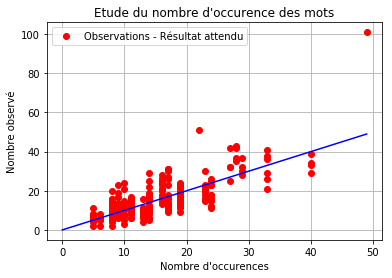

In [20]:
trace_graphique2D_occurences(seq_PHO_list, 4)

taille de la séquence : 4000 nucléotides


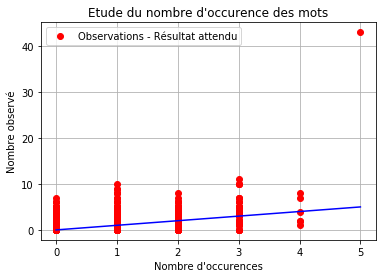

In [21]:
trace_graphique2D_occurences(seq_PHO_list, 6)

taille de la séquence : 4000 nucléotides


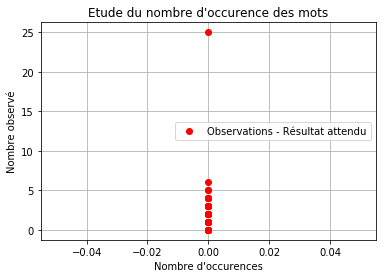

In [22]:
trace_graphique2D_occurences(seq_PHO_list, 8)

#### Analyse MET

taille de la séquence : 7200 nucléotides


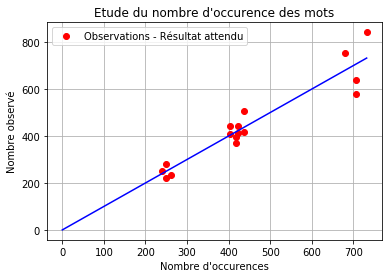

In [23]:
trace_graphique2D_occurences(seq_MET_list, 2)

taille de la séquence : 7200 nucléotides


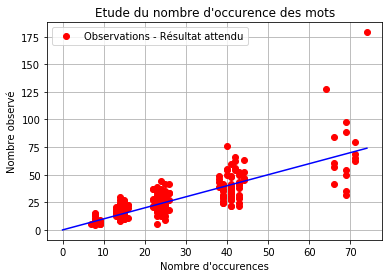

In [24]:
trace_graphique2D_occurences(seq_MET_list, 4)

taille de la séquence : 7200 nucléotides


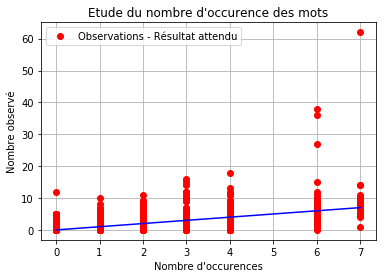

In [25]:
trace_graphique2D_occurences(seq_MET_list, 6)

taille de la séquence : 7200 nucléotides


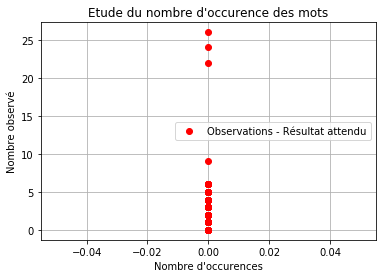

In [26]:
trace_graphique2D_occurences(seq_MET_list, 8)

#### Analyse GAL

taille de la séquence : 5612 nucléotides


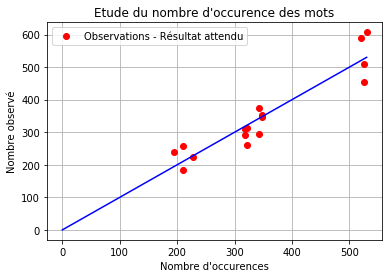

In [27]:
trace_graphique2D_occurences(seq_GAL_list, 2)

taille de la séquence : 5612 nucléotides


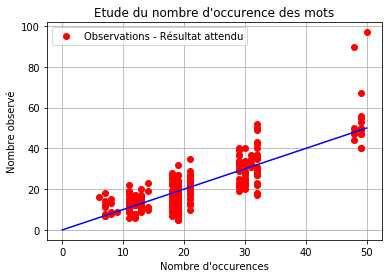

In [28]:
trace_graphique2D_occurences(seq_GAL_list, 4)

taille de la séquence : 5612 nucléotides


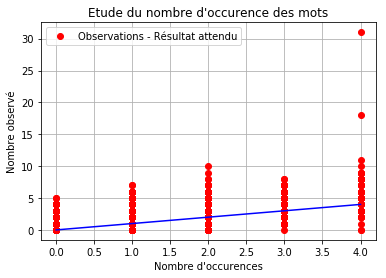

In [29]:
trace_graphique2D_occurences(seq_GAL_list, 6)

taille de la séquence : 5612 nucléotides


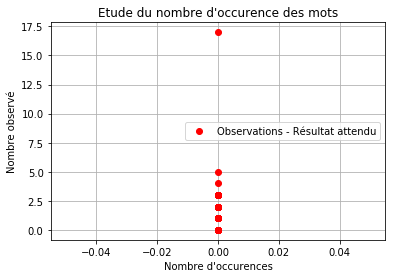

In [30]:
trace_graphique2D_occurences(seq_GAL_list, 8)

### 3.2 Simulation de séquences aléatoires

#### Question 1

In [31]:
# Model de fréquence
model = [a,c,g,t]

In [32]:
def simule_sequence(lg,m):
    sequence = []
    for i in range(lg):
        sequence.append((np.random.choice([0, 1, 2, 3], p=m)))
    return list(sequence)
l = simule_sequence(10,model)
l
decode_sequence(l)

'GTGTTCTGTT'

#### Question 2

On fait le graphe avec les occurrences pour une séquence de longueur 1000000 et des mots de taille 6.

taille de la séquence : 1000000 nucléotides


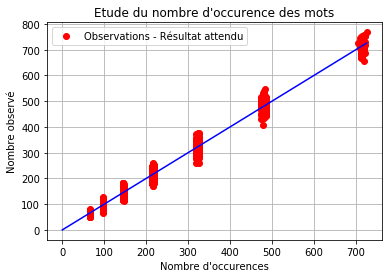

In [33]:
trace_graphique2D_occurences(simule_sequence(1000000,model), 6)

#### Question 3

In [36]:
def estime_proba_mot(mot, n, lg, m):
    nb_obs = 0 # nombre de fois où on observe le mot au moins n fois
    nb_simulations = 100 # Nombre de simulations à effectuer
    for i in range(nb_simulations):
        sequence = simule_sequence(lg, m)
        nb_mot = compte_occurences(decode_sequence(sequence), len(mot))[mot]
        if (nb_mot) >= n:
            nb_obs += 1
    return nb_obs/nb_simulations

In [37]:
estime_proba_mot("ATCTGC", 5, 10000, [0.25, 0.25, 0.25, 0.25])

0.09

In [38]:
estime_proba_mot("TTTAAA", 5, 10000, [0.25, 0.25, 0.25, 0.25])

0.12

In [39]:
estime_proba_mot("AAAAAA", 5, 10000, [0.7, 0.1, 0.1, 0.1])

1.0

#### Question 4

In [40]:
def transforme_dict_to_list(d):
    l = sorted(d.items(), key = lambda x: x[0])
    l1 = []
    for k in l:
        #print(k[0])
        l1.append(k[1])
    return l1
#transforme_dict_to_list(d)

Text(0.5,1,"Distribution du comptage du mot 'AAAAAA' sur 1000 séquences")

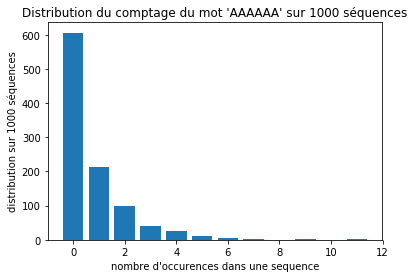

In [41]:
word = 'AAAAAA'

k = 6   
res = []
indice = code(word, k)
#on simule 1000 séquences et on stocke à chaque fois le nombre d'occurences
#du mot qui nous intéresse
for i in range(1000):
    sequence = simule_sequence(1000, model)
    di = compte_occurences(decode_sequence(sequence), k)
    res.append(transforme_dict_to_list(di)[indice])

#on affiche les histogrammes en modifiant le mot qui nous intéresse
plt.bar(list(set(res)), [len(np.where(np.array(res)==k)[0]) for k in set(res)])
plt.xlabel("nombre d'occurences dans une sequence")
plt.ylabel("distribution sur 1000 séquences")
plt.title("Distribution du comptage du mot '{}' sur 1000 séquences".format(word))

Text(0.5,1,"Distribution du comptage du mot 'ATCTGC' sur 1000 séquences")

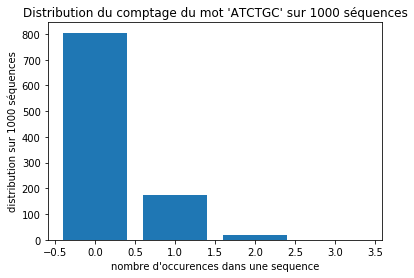

In [42]:
word = 'ATCTGC'

k = 6   
res = []
indice = code(word, k)
#on simule 1000 séquences et on stocke à chaque fois le nombre d'occurences
#du mot qui nous intéresse
for i in range(1000):
    sequence = simule_sequence(1000, model)
    di = compte_occurences(decode_sequence(sequence), k)
    res.append(transforme_dict_to_list(di)[indice])

#on affiche les histogrammes en modifiant le mot qui nous intéresse
plt.bar(list(set(res)), [len(np.where(np.array(res)==k)[0]) for k in set(res)])
plt.xlabel("nombre d'occurences dans une sequence")
plt.ylabel("distribution sur 1000 séquences")
plt.title("Distribution du comptage du mot '{}' sur 1000 séquences".format(word))

Text(0.5,1,"Distribution du comptage du mot 'TTTAAA' sur 1000 séquences")

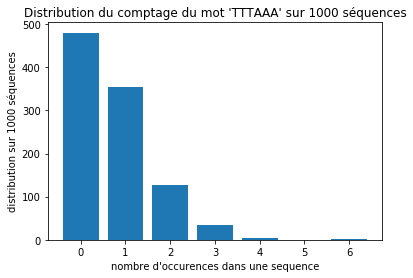

In [43]:
word = 'TTTAAA'

k = 6   
res = []
indice = code(word, k)
#on simule 1000 séquences et on stocke à chaque fois le nombre d'occurences
#du mot qui nous intéresse
for i in range(1000):
    sequence = simule_sequence(1000, model)
    di = compte_occurences(decode_sequence(sequence), k)
    res.append(transforme_dict_to_list(di)[indice])

#on affiche les histogrammes en modifiant le mot qui nous intéresse
plt.bar(list(set(res)), [len(np.where(np.array(res)==k)[0]) for k in set(res)])
plt.xlabel("nombre d'occurences dans une sequence")
plt.ylabel("distribution sur 1000 séquences")
plt.title("Distribution du comptage du mot '{}' sur 1000 séquences".format(word))

Text(0.5,1,"Distribution du comptage du mot 'ATATAT' sur 1000 séquences")

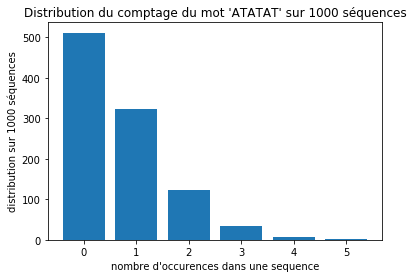

In [44]:
word = 'ATATAT'

k = 6   
res = []
indice = code(word, k)
#on simule 1000 séquences et on stocke à chaque fois le nombre d'occurences
#du mot qui nous intéresse
for i in range(1000):
    sequence = simule_sequence(1000, model)
    di = compte_occurences(decode_sequence(sequence), k)
    res.append(transforme_dict_to_list(di)[indice])

#on affiche les histogrammes en modifiant le mot qui nous intéresse
plt.bar(list(set(res)), [len(np.where(np.array(res)==k)[0]) for k in set(res)])
plt.xlabel("nombre d'occurences dans une sequence")
plt.ylabel("distribution sur 1000 séquences")
plt.title("Distribution du comptage du mot '{}' sur 1000 séquences".format(word))

On constate que, même si 'ATATAT' et 'TTTAAA' ont la même probabilité d'apparaître, ils n'ont pas la même distribution.

## Partie 3 : Modèles de dinucléotides et trinucléotides


#### Question 1

C'est bien une chaîne de Markov d'ordre 1 car la probabilité d'un état ne dépend que de l'état précédant.

#### Question 2

In [46]:
def estime_matrice(seq):
    d = compte_occurences(seq,2)
    #print(d)
    matrice = np.array(transforme_dict_to_list(d), dtype=float).reshape((4, 4))
    n = matrice.shape[0]
    #print(n)
    for i in range(0,n):
        #print(i)
        #print(matrice[i])
        somme = np.sum(matrice[i])
        #print("somme",somme)
        if somme != 0:
            matrice[i] = matrice[i] / somme
        #print(matrice[i])
    return matrice
estime_matrice('ATCAT')


array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [47]:
seq1 =  decode_sequence(list(d_cerevisae.values())[0])
M = estime_matrice(seq1)

In [48]:
estime_matrice('ATCAT')

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [49]:
a = estime_matrice('ATCAT')
b=np.cumsum(a,axis=1)
b

array([[0., 0., 0., 1.],
       [1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [0., 1., 1., 1.]])

In [50]:
a = estime_matrice(seq1).reshape((4,4))
np.cumsum(a,axis=1)

array([[0.31802246, 0.51316837, 0.719645  , 1.        ],
       [0.33574685, 0.54723421, 0.71135328, 1.        ],
       [0.30463099, 0.50693326, 0.717815  , 1.        ],
       [0.23494806, 0.4458368 , 0.68240015, 1.        ]])

#### Question 3

In [51]:
def simule_seq_dinucleotide(l,modele_dinucleotide):
    a = np.random.choice([0, 1, 2, 3], p=[0.25, 0.25, 0.25, 0.25])
    c = [np.asscalar(a)]
    seq = ""+decode_sequence(c)
    new_modele = modele_dinucleotide
    b = np.cumsum(new_modele,axis=1)
    for i in range(1,l):
        val_aleatoire = random.uniform(0,1)
        if seq[i-1] == 'A':
            if val_aleatoire < b[0][0]:
                seq += 'A'
            elif val_aleatoire < b[0][1]:
                seq += 'C'
            elif val_aleatoire < b[0][2]:
                seq += 'G'
            else :
                seq += 'T'
        if seq[i-1] == 'C':
            if val_aleatoire < b[1][0]:
                seq += 'A'
            elif val_aleatoire < b[1][1]:
                seq += 'C'
            elif val_aleatoire < b[1][2]:
                seq += 'G'
            else :
                seq += 'T'
        if seq[i-1] == 'G':
            if val_aleatoire < b[2][0]:
                seq += 'A'
            elif val_aleatoire < b[2][1]:
                seq += 'C'
            elif val_aleatoire < b[2][2]:
                seq += 'G'
            else :
                seq += 'T'
        if seq[i-1] == 'T':
            if val_aleatoire < b[3][0]:
                seq += 'A'
            elif val_aleatoire < b[3][1]:
                seq += 'C'
            elif val_aleatoire < b[3][2]:
                seq += 'G'
            else :
                seq += 'T'
    return seq
                

In [52]:
seq_ob=simule_seq_dinucleotide(100000,modele_dinucleotide=estime_matrice(seq1))

In [53]:
estime_matrice(seq_ob)

array([[0.31780776, 0.19726813, 0.20674536, 0.27817875],
       [0.34099391, 0.2076704 , 0.16627382, 0.28506187],
       [0.30811251, 0.19948249, 0.21208491, 0.28032009],
       [0.23536887, 0.21029674, 0.23791043, 0.31642396]])

array([[0.32432726, 0.19478952, 0.19576739, 0.28511584],
       [0.33738144, 0.21327827, 0.15789382, 0.29144647],
       [0.30852133, 0.20549822, 0.20958992, 0.27639054],
       [0.24446475, 0.21700152, 0.22266952, 0.31586422]])

Les résultats sont très similaires au model.

#### Question 4

In [80]:
model = [a,c,g,t]
model

[0.29983548323371834,
 0.2011019721740499,
 0.19999697915577738,
 0.29906556543645435]

In [81]:
decode_sequence([1,2,3])

'CGT'

In [89]:
def logproba_mot(mot, model, Matrice):
    res = math.log(model[mot[0]])
    for i in range(1, len(mot)):
        res += math.log(Matrice[mot[i-1], mot[i]])
    return res
logproba_mot([1,2,3], model, M)

-4.676298670734517

#### Question 5

In [90]:
model = [a,c,g,t]
model

[0.29983548323371834,
 0.2011019721740499,
 0.19999697915577738,
 0.29906556543645435]

In [91]:
M

array([[0.31802246, 0.19514591, 0.20647664, 0.280355  ],
       [0.33574685, 0.21148736, 0.16411907, 0.28864672],
       [0.30463099, 0.20230228, 0.21088174, 0.282185  ],
       [0.23494806, 0.21088875, 0.23656334, 0.31759985]])

In [92]:
def comptage_attendu_mot(model, Matrice, k, l):
    tab = []
    for i in range(pow(4, k)):
        seq = encode_sequence(inverse(i,k))
        val = logproba_mot(seq, model, Matrice)
        tab.append(math.exp(val) * (l - (k - 1)))
    return tab

In [93]:
print("Espérance du nombre d'occurences de chaque mot de taille 2 dans une séquence de taille 100 :")
for i, esp in enumerate(comptage_attendu_mot([a, c, g, t], M, 2, 100)):
    print("Mot {} : {:.4f}".format(encode_sequence(inverse(i, 2)), esp))

Espérance du nombre d'occurences de chaque mot de taille 2 dans une séquence de taille 100 :
Mot [0, 0] : 9.4401
Mot [0, 1] : 5.7927
Mot [0, 2] : 6.1290
Mot [0, 3] : 8.3220
Mot [1, 0] : 6.6844
Mot [1, 1] : 4.2105
Mot [1, 2] : 3.2675
Mot [1, 3] : 5.7467
Mot [2, 0] : 6.0316
Mot [2, 1] : 4.0055
Mot [2, 2] : 4.1754
Mot [2, 3] : 5.5872
Mot [3, 0] : 6.9562
Mot [3, 1] : 6.2439
Mot [3, 2] : 7.0040
Mot [3, 3] : 9.4033


In [ ]:
seq_PHO_list = convert_dict_to_sequence(d_PHO)
seq_GAL_list = convert_dict_to_sequence(d_GAL)
seq_MET_list = convert_dict_to_sequence(d_MET)
seq_s_cerevisae_list = list(d_cerevisae.values())[0]

In [107]:
def code1(m, k):
    res = m[0]
    for i in range(1, k):
        res = 4*res + m[i]
    return res

def comptage(seq, k):

    dico = {}
    if isinstance(seq, str):
        for i in range(len(seq) - k + 1):
            temp = seq[i: i + k]
            if temp in dico:
                dico[temp] += 1
            else:
                dico[temp] = 1
    else:
        for i in range(len(seq) - k + 1):
            temp = seq[i: i + k]
            code_temp = code1(temp, k)
            if code_temp in dico:
                dico[code_temp] += 1
            else:
                dico[code_temp] = 1
    return dico

In [114]:
def graphe_occurrences_mot(m, M, k, dict_sequences, filename = None):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.grid(True)
    ax.set_axisbelow(True)
    minVal = float("inf")
    maxVal = -float("inf")
    for seq_name in dict_sequences:
        sequence = dict_sequences[seq_name]
        l = len(sequence)
        x = comptage_attendu_mot(m, M, k, l)
        y = comptage(sequence, k) # Dictionnaire. On le transforme en liste.
        y = [y[i] if i in y else 0 for i in range(4**k)]
        minVal = min(min(x), min(y), minVal)
        maxVal = max(max(x), max(y), maxVal)
        ax.scatter(x, y, label=seq_name, zorder=3)

    ax.plot([minVal, maxVal], [minVal, maxVal], color="#999999", zorder=2)
    ax.set_aspect("equal")
    ax.set_xlabel("Nombre attendu")
    ax.set_ylabel("Nombre observé")
    ax.set_title("Nombre d'occurrences pour des mots de taille {:d}".format(k))
    ax.legend(loc="lower right")
    plt.show()

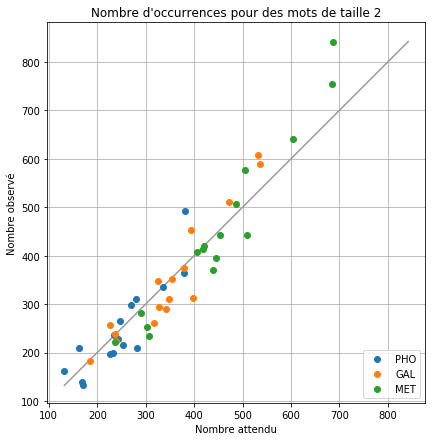

In [115]:
graphe_occurrences_mot((a, c, g, t), M, 2, {"PHO": seq_PHO_list, "GAL": seq_GAL_list, "MET": seq_MET_list})

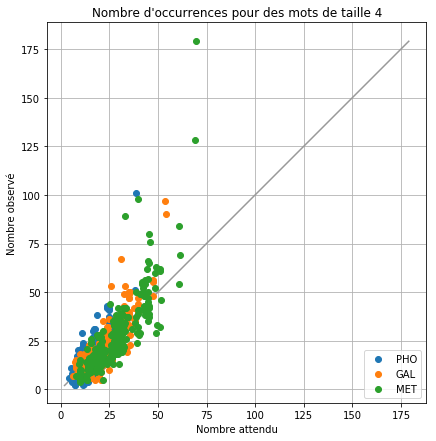

In [116]:
graphe_occurrences_mot((a, c, g, t), M, 4, {"PHO": seq_PHO_list, "GAL": seq_GAL_list, "MET": seq_MET_list})

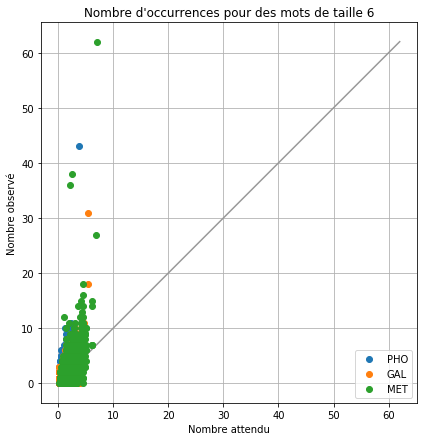

In [117]:
graphe_occurrences_mot((a, c, g, t), M, 6, {"PHO": seq_PHO_list, "GAL": seq_GAL_list, "MET": seq_MET_list})

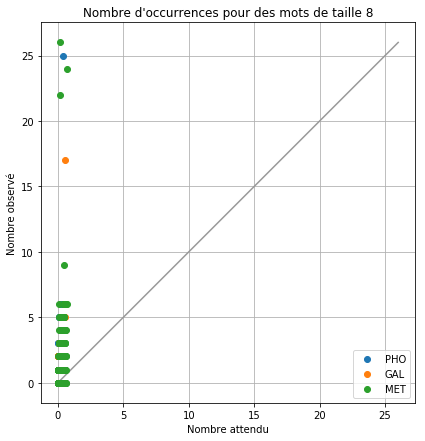

In [118]:
graphe_occurrences_mot((a, c, g, t), M, 8, {"PHO": seq_PHO_list, "GAL": seq_GAL_list, "MET": seq_MET_list})

## Partie 4 : Probabilité de mots


##### Question 1

Cette loi binomiale a comme paramètre n = l-k+1 et p = probabilité d'apparition du mot w.

##### Question 2

Pour n très grand, cette loi binomiale converge vers une loi de Poisson.

##### Question 3

On calcule les probabilités empiriques du nombre d'occurrences des mots ATCTGC, ATATAT, TTTAAA et AAAAAA avec le modèle dinucléotide.

In [123]:
def proba_empirique_Markov(mot, lg, m, M, N):
    proba = {}
    k = len(mot)
    code_mot = code1(mot, k)
    for i in range(N):
        seq = simule_Markov(m, M, lg)
        compt = comptage(seq, k)
        if code_mot in compt:
            cpt = compt[code_mot]
        else:
            cpt = 0
        if cpt in proba:
            proba[cpt] += 1
        else:
            proba[cpt] = 1
    return {cpt : proba[cpt]/N for cpt in proba}

In [126]:
def simule_Markov(m, M, lg):
    seq = np.empty(lg, dtype=int)
    seq[0] = np.random.choice(4, p = m)
    for i in range(1, lg):
        seq[i] = np.random.choice(4, p = M[seq[i-1], :])
    return seq

In [127]:
probas = {}
L = 10000
for mot in ["ATCTGC", "ATATAT", "TTTAAA", "AAAAAA"]:
    print("Mot "+mot+":")
    probas[mot] = proba_empirique_Markov(encode_sequence(mot), L, (a, c, g, t), M, 1000)
    print(probas[mot])
    print("")

Mot ATCTGC:
{0: 0.087, 3: 0.211, 4: 0.129, 5: 0.059, 1: 0.215, 2: 0.269, 6: 0.019, 8: 0.004, 7: 0.006, 9: 0.001}

Mot ATATAT:
{0: 0.036, 1: 0.111, 5: 0.115, 6: 0.074, 3: 0.22, 4: 0.173, 2: 0.181, 7: 0.046, 8: 0.022, 12: 0.003, 9: 0.013, 10: 0.006}

Mot TTTAAA:
{15: 0.002, 8: 0.133, 5: 0.116, 11: 0.05, 10: 0.071, 9: 0.104, 6: 0.147, 7: 0.166, 13: 0.02, 4: 0.083, 3: 0.046, 2: 0.019, 12: 0.028, 1: 0.005, 14: 0.009, 0: 0.001}

Mot AAAAAA:
{5: 0.075, 9: 0.102, 3: 0.033, 11: 0.084, 10: 0.093, 13: 0.06, 6: 0.086, 7: 0.079, 14: 0.035, 8: 0.103, 12: 0.068, 16: 0.022, 18: 0.019, 2: 0.019, 17: 0.028, 4: 0.039, 15: 0.027, 22: 0.004, 23: 0.001, 21: 0.003, 19: 0.011, 27: 0.001, 1: 0.003, 26: 0.001, 24: 0.001, 25: 0.001, 20: 0.002}



F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  # This is added back by InteractiveShellApp.init_path()


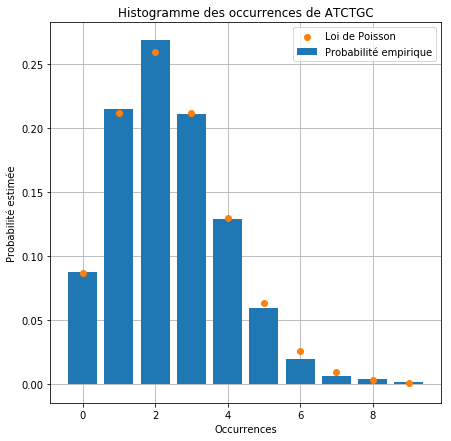

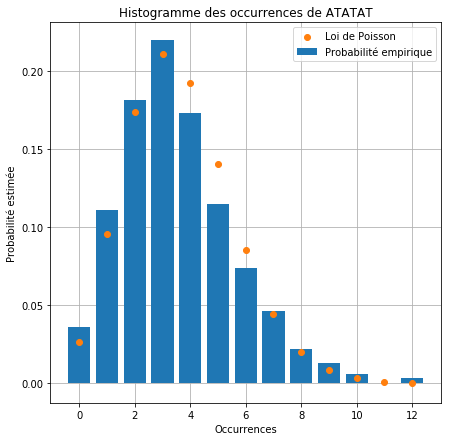

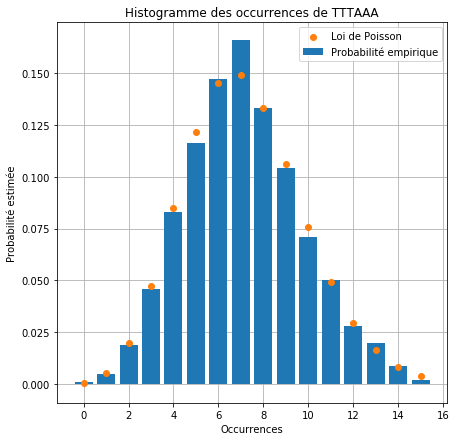

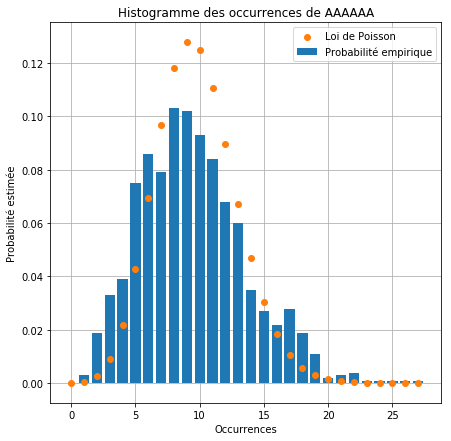

In [131]:
for mot in probas:
    fig, ax = plt.subplots(figsize=(7, 7))
    # Probabilité calculée avec une loi de Poisson :
    p = np.exp(logproba_mot(encode_sequence(mot), (a, c, g, t), M)) # Probabilité du mot
    lamb = p * (L - len(mot) + 1) # Paramètre de la loi de Poisson

    nMax = max(probas[mot].keys())+1
    k = np.arange(nMax)
    
    ax.bar(probas[mot].keys(), probas[mot].values(), zorder=1, label="Probabilité empirique")
    ax.scatter(k, (lamb**k)/factorial(k) * np.exp(-lamb), zorder=2, label="Loi de Poisson")
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.set_title("Histogramme des occurrences de "+mot)
    ax.set_xlabel("Occurrences")
    ax.set_ylabel("Probabilité estimée")
    ax.legend(loc="upper right")

On remarque que les probabilités obtenues empiriquement sont très proches de celles obtenues grâce à la loi binomiale pour les mots non chevauchant comme 'ATCTGC'. Lorsque les mots sont chevauchant ('AAAAAA' par exemple), les résultats observés ne coïncident plus avec les résultats attendus.

##### Question 4

In [132]:
def proba_Poisson(mot, m, M, lg, eps = 1e-4):
    p = np.exp(logproba_mot(mot, m, M)) # Probabilité du mot
    lamb = p * (lg - len(mot) + 1) # Paramètre de la loi de Poisson
    pCumul = 0
    k = 0
    proba = []
    while pCumul < 1 - eps:
        proba.append((lamb**k)/factorial(k)*np.exp(-lamb))
        pCumul += proba[-1]
        k += 1
    return proba

def proba_Poisson_geq_n(mot, m, M, lg, n):
    p = np.exp(logproba_mot(mot, m, M)) # Probabilité du mot
    lamb = p * (lg - len(mot) + 1) # Paramètre de la loi de Poisson
    poisson = stats.poisson(lamb)
    return 1 - poisson.cdf(n-1)

def proba_Poisson_from_list(m, M, k, seq, eps, verbose = False):
    mots_res = []
    lg = len(seq)
    cpt = comptage(seq, k)
    for i in range(4**k):
        mot = inverse(i,k)
        n = 0 if i not in cpt else cpt[i]
        proba = proba_Poisson_geq_n(mot, m, M, lg, n)
        if verbose:
            print("Mot ",mot," :\n\tOccurrences : ",n,
                  "\n\tP(N >= {:d}) = {:.4f}".format(n, proba), sep="")
        if proba < eps:
            mots_res.append(mot)
    return mots_res

In [136]:
probas_Poisson = proba_Poisson(encode_sequence("ATCTGC"), (a, c, g, t), M, 10000, eps = 1e-4)
for i, p in enumerate(probas_Poisson):
    print("P(N = {:d}) = {:.4f}".format(i, p))

P(N = 0) = 0.0865
P(N = 1) = 0.2117
P(N = 2) = 0.2591
P(N = 3) = 0.2114
P(N = 4) = 0.1294
P(N = 5) = 0.0633
P(N = 6) = 0.0258
P(N = 7) = 0.0090
P(N = 8) = 0.0028
P(N = 9) = 0.0008
P(N = 10) = 0.0002


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  


In [141]:
for i in range(12):
    print("P(N >= {:d}) = {:.4f}"
          .format(i,proba_Poisson_geq_n(encode_sequence("ATCTGC"), (a, c, g, t), M, 10000, i)))

P(N >= 0) = 1.0000
P(N >= 1) = 0.9135
P(N >= 2) = 0.7018
P(N >= 3) = 0.4427
P(N >= 4) = 0.2313
P(N >= 5) = 0.1019
P(N >= 6) = 0.0386
P(N >= 7) = 0.0128
P(N >= 8) = 0.0037
P(N >= 9) = 0.0010
P(N >= 10) = 0.0002
P(N >= 11) = 0.0001


##### Question 5